In [30]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV #交叉验证
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model.coordinate_descent import ConvergenceWarning

In [31]:
def notEmpty(s):
    return s != ''

In [32]:
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [33]:
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "datas/boston_housing.data"
### 由于数据格式不统一， 所以读取的时候，先按照一行一个字段属性读取数据， 然后再按照每行数据进行处理
fd = pd.read_csv(path, header=None)  #读取的数据是一行, 一行是一个样本，包括14个特征值（506，1）
print(fd.shape)
# print(fd)
data = np.empty((len(fd), 14))
print(data.shape)
for  i, d in enumerate(fd.values):
    d = map(float, filter(notEmpty, d[0].split(' ')))
    data[i] = list(d)
print(data.shape)
    
x, y = np.split(data, (13,), axis=1) #切割数据，获取x和y

print ("样本数据量:%d, 特征个数：%d" % x.shape)
print ("target样本数据量:%d" % y.shape[0])

(506, 1)
(506, 14)
(506, 14)
样本数据量:506, 特征个数：13
target样本数据量:506


In [34]:
# 数据的分割
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.8, random_state=14)
x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1
# print(x_train.shape)
print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0]))

训练数据集样本数目：404, 测试数据集样本数目：102


In [35]:
# 标准化
ss = MinMaxScaler()

x_train = ss.fit_transform(x_train, y_train)
x_test = ss.transform(x_test)

print("原始数据各个特征属性的调整最小值：", ss.min_)
print("原始数据各个特征属性的缩放数据值：", ss.scale_)

原始数据各个特征属性的调整最小值： [-7.10352762e-05  0.00000000e+00 -1.68621701e-02  0.00000000e+00
 -7.92181070e-01 -6.82314620e-01 -2.98661174e-02 -1.02719857e-01
 -4.34782609e-02 -3.56870229e-01 -1.34042553e+00 -6.38977636e-03
 -4.90780142e-02]
原始数据各个特征属性的缩放数据值： [1.12397589e-02 1.00000000e-02 3.66568915e-02 1.00000000e+00
 2.05761317e+00 1.91607588e-01 1.02986612e-02 9.09347180e-02
 4.34782609e-02 1.90839695e-03 1.06382979e-01 2.53562554e-03
 2.83687943e-02]


In [36]:
#  构建模型（回归）
model = DecisionTreeRegressor(criterion='mse', max_depth=7)
# 模型训练
model.fit(x_train, y_train)
# 模型预测
y_test_hat = model.predict(x_test)

In [37]:
# 模型评估
score = model.score(x_test, y_test)
print("决策树的score Score:", score)

Score: 0.8252368181954078


In [39]:
# 构建线性回归模型
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_y_test_hat = lr.predict(x_test) #获取测试集的测试值
lr_score = lr.score(x_test, y_test)
print("线性回归模型的score lr:",lr_score)

#  构建lasso
lasso = LassoCV(alphas=np.logspace(-3, 1, 20))
lasso.fit(x_train, y_train)
lasso_y_test_hat = lasso.predict(x_test) #对测试集进行预测的值
lasso_score = lasso.score(x_test, y_test)
print("lasso:", lasso_score)
# 岭回归
ridge = RidgeCV(alphas=np.logspace(-3, 1, 20))
ridge.fit(x_train, y_train)
ridge_y_test_hat = ridge.predict(x_test)
ridge_score = ridge.score(x_test, y_test)
print("ridge:", ridge_score)

print("其实正确率都不高")

线性回归模型的score lr: 0.6177265992293743
lasso: 0.6178877460212681
ridge: 0.6209247731652422


c:\python_3.6.0\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


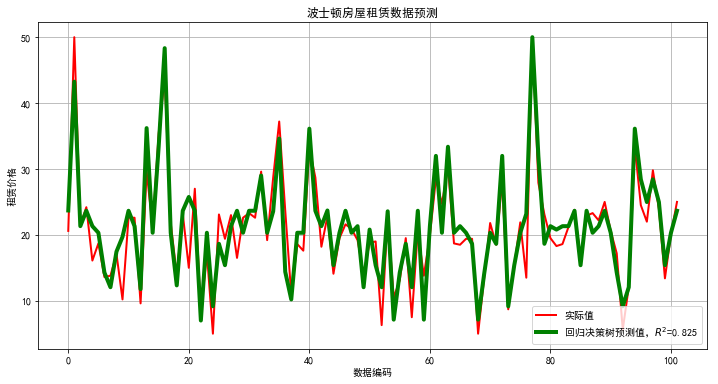

In [41]:
##  7， 画图
plt.figure(figsize=(12,6), facecolor='w')
ln_x_test = range(len(x_test))

plt.plot(ln_x_test, y_test, 'r-', lw=2, label=u'实际值')
# plt.plot(ln_x_test, lr_y_test_hat, 'b-', lw=2, label=u'Linear回归，$R^2$=%.3f' % lr_score)
# plt.plot(ln_x_test, lasso_y_test_hat, 'y-', lw=2, label=u'Lasso回归，$R^2$=%.3f' % lasso_score)
# plt.plot(ln_x_test, ridge_y_test_hat, 'c-', lw=2, label=u'Ridge回归，$R^2$=%.3f' % ridge_score)
plt.plot(ln_x_test, y_test_hat, 'g-', lw=4, label=u'回归决策树预测值，$R^2$=%.3f' % score)
plt.xlabel(u'数据编码')
plt.ylabel(u'租赁价格')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.title(u'波士顿房屋租赁数据预测')
plt.show()

###  以上是常规处理的步骤，，，效果一般般

In [43]:
# 参数优化
pipes = [
    Pipeline([
            ('mms', MinMaxScaler()), #归一化操作
            ('pca', PCA()),  #PCA 降维
            ('decision', DecisionTreeRegressor(criterion='mse'))
    ]),
    Pipeline([
        ('mms', MinMaxScaler()),
        ('decision', DecisionTreeRegressor())
    ]),
    Pipeline([
        ('decision', DecisionTreeRegressor())
    ])
]

# 参数
parameters = [
    {
        "pca__n_components":[0.25, 0.5, 0.75, 1],
        "decision__max_depth": np.linspace(1, 20, 20).astype(np.int8)
    },
    {
    "decision__max_depth":  np.linspace(1,20,20).astype(np.int8)
    },
    {
    "decision__max_depth":  np.linspace(1,20,20).astype(np.int8)
    }
]
# 获取数据
x_train2, x_test2, y_train2, y_test2 = x_train1, x_test1, y_train1, y_test1

for t in range(3):
    pipe = pipes[t]

    gscv = GridSearchCV(pipe, param_grid=parameters[t]) #使用网格交叉验证
    
    gscv.fit(x_train2, y_train2)
    
    print(t, "score值：", gscv.best_score_, "最优参数列表：", gscv.best_params_)


0 score值： 0.4137216857767154 最优参数列表： {'decision__max_depth': 10, 'pca__n_components': 0.75}
1 score值： 0.7115171965412518 最优参数列表： {'decision__max_depth': 9}
2 score值： 0.755519189411878 最优参数列表： {'decision__max_depth': 11}


In [44]:
# 使用最优参数看看正确率
mms_best = MinMaxScaler()
decision3 = DecisionTreeRegressor(criterion='mse', max_depth=4)

x_train3, x_test3, y_train3, y_test3 = x_train1, x_test1, y_train1, y_test1
x_train3 = mms_best.fit_transform(x_train3, y_train3)
x_test3 = mms_best.transform(x_test3)
decision3.fit(x_train3, y_train3)

print ("正确率:", decision3.score(x_test3, y_test3)) #结果有明显的提高

正确率: 0.8435980902870441


1深度，正确率0.32761
2深度，正确率0.62189
3深度，正确率0.78241
4深度，正确率0.84360
5深度，正确率0.85422
6深度，正确率0.80279
7深度，正确率0.82787
8深度，正确率0.79181
9深度，正确率0.81868
10深度，正确率0.80506
11深度，正确率0.79318
12深度，正确率0.79260
13深度，正确率0.79027
14深度，正确率0.79650
15深度，正确率0.79206
16深度，正确率0.77904
17深度，正确率0.77386
18深度，正确率0.77175
19深度，正确率0.79797


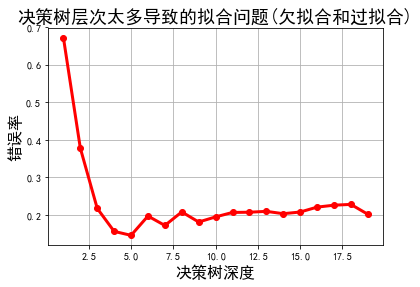

In [45]:
#查看各个不同深度的错误率
x_train4, x_test4, y_train4, y_test4 = x_train1, x_test1, y_train1, y_test1

depths = np.arange(1, 20)
err_list = []
for d in depths:
    clf = DecisionTreeRegressor(criterion='mse', max_depth=d)
    clf.fit(x_train4, y_train4)
    
    score1 = clf.score(x_test4, y_test4) # 测试集的准确率
    err = 1 - score1
    err_list.append(err)
    print ("%d深度，正确率%.5f" % (d, score1))

## 画图
plt.figure(facecolor='w')
plt.plot(depths, err_list, 'ro-', lw=3)
plt.xlabel(u'决策树深度', fontsize=16)
plt.ylabel(u'错误率', fontsize=16)
plt.grid(True)
plt.title(u'决策树层次太多导致的拟合问题(欠拟合和过拟合)', fontsize=18)
plt.show()